In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:

# Function to download monthly stock prices
def obter_cotacoes_mensais(ticker, inicio, fim):
    dados = yf.download(ticker, start=inicio, end=fim, interval="1mo")
    
    # Handle multi-level column index if it exists
    if isinstance(dados.columns, pd.MultiIndex):
        close_prices = dados['Close'][ticker]  # Select the 'Close' column for the ticker
    else:
        close_prices = dados['Close']  # Single-level index case
    
    return close_prices

In [58]:
# Function to simulate monthly investments
def simular_investimento(cotacoes, aporte_mensal):
    quantidade_acoes = []
    total_aportado = 0
    patrimonio = []

    for i, preco in enumerate(cotacoes):
        index_date = pd.to_datetime(cotacoes.index[i])
        # if index_date.year > 2022:
        #     quantidade_acoes.append(0)
        #     patrimonio.append(sum(quantidade_acoes) * preco)
        #     continue

        if not pd.isna(preco):
            acoes_compradas = aporte_mensal / preco
            quantidade_acoes.append(acoes_compradas)
            total_aportado += aporte_mensal
        else:
            quantidade_acoes.append(0)

        patrimonio.append(sum(quantidade_acoes) * preco)

    return quantidade_acoes, patrimonio, total_aportado

[*********************100%***********************]  1 of 1 completed


Total aportado: R$158,000.00
Valor final do patrimônio: R$6,192,476.36
Rentabilidade Total: 3819.29%
Rentabilidade Anual Média (CAGR): 32.37%


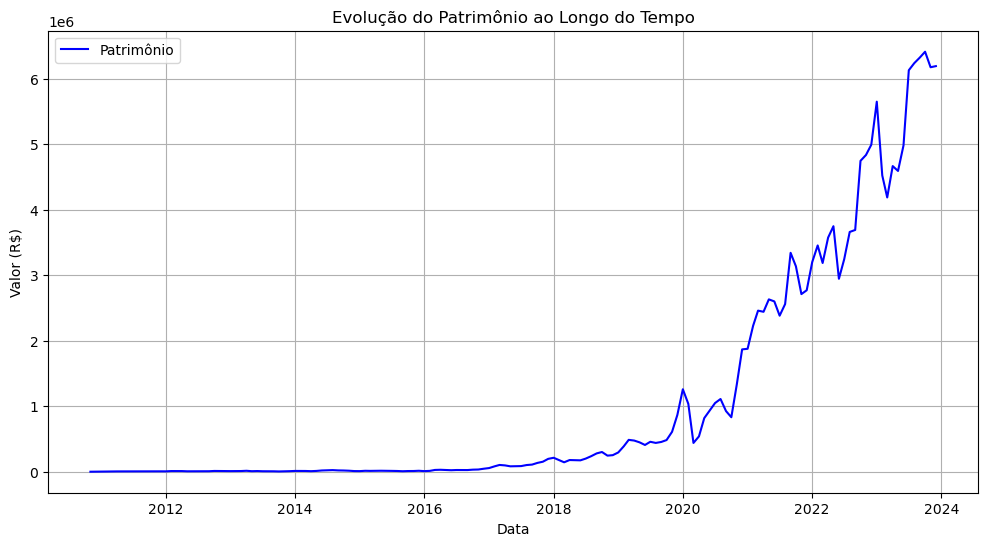

In [59]:

# Configurações iniciais
ticker = "PRIO3.SA"  # Exemplo: Itau Unibanco
inicio = "2010-01-01"  # Data de início
fim = "2023-12-31"  # Data final
aporte_mensal = 1000  # Valor do aporte mensal

cotacoes = obter_cotacoes_mensais(ticker, inicio, fim)
quantidade_acoes, patrimonio, total_aportado = simular_investimento(cotacoes, aporte_mensal)

# Exibir resultados
resultado = pd.DataFrame({
    "Data": cotacoes.index,
    "Preco Ação": cotacoes.values,
    "Patrimônio": patrimonio
})
resultado.set_index("Data", inplace=True)

print(f"Total aportado: R${total_aportado:,.2f}")
print(f"Valor final do patrimônio: R${patrimonio[-1]:,.2f}")

# Calcular rentabilidade total
rentabilidade_total = (patrimonio[-1] - total_aportado) / total_aportado * 100

# Calcular rentabilidade anual média (CAGR)
anos = (cotacoes.index[-1] - cotacoes.index[0]).days / 365.25
valor_inicial = aporte_mensal * len(cotacoes)  # Aproximação do valor inicial aportado
cagr = (patrimonio[-1] / valor_inicial) ** (1 / anos) - 1

# Exibir os resultados
print(f"Rentabilidade Total: {rentabilidade_total:.2f}%")
print(f"Rentabilidade Anual Média (CAGR): {cagr * 100:.2f}%")

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(resultado.index, resultado["Patrimônio"], label="Patrimônio", color="blue")
plt.title("Evolução do Patrimônio ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Valor (R$)")
plt.legend()
plt.grid()
plt.show()
